# Gaussian integral

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

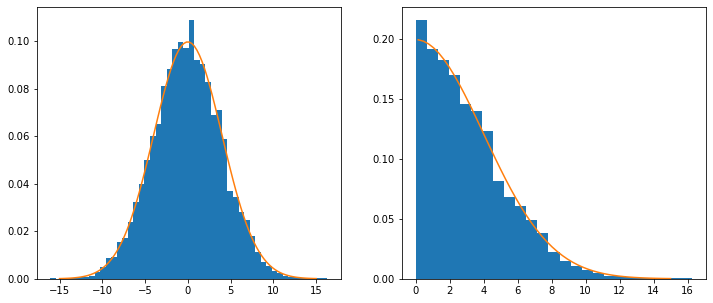

In [25]:
mean_g = 0
sigma_g = 4
N = 10000

distg = norm(loc = 0, scale = 4)
x_rand = distg.rvs(N)

fig, ax = plt.subplots(1,2,figsize=(12,5))
xaxis = np.linspace(-15, 15, 100)
ax[0].hist(x_rand, density = True, bins=50)
ax[0].plot(xaxis, distg.pdf(xaxis))

x_rand_pos = x_rand[x_rand > 0]
ax[1].hist(x_rand_pos, density = True, bins = 25)
ax[1].plot(xaxis[xaxis>0], 2*distg.pdf(xaxis[xaxis>0]))

In [49]:
integral = np.sum(x_rand_pos**3*sigma_g*np.sqrt(np.pi/2))/len(x_rand_pos)
print(integral)

true_res = 2*sigma_g**4
print(true_res)

521.1720662569425
512


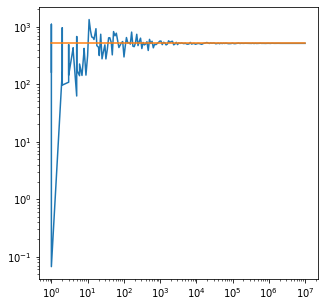

In [69]:
N_tries = np.logspace(0,7,200,dtype = int)
integral_arr = np.zeros(len(N_tries))

for i in range(len(N_tries)):
    x_rand = distg.rvs(N_tries[i])
    x_rand_pos = np.abs(x_rand)
    integral_arr[i] = np.sum(x_rand_pos**3*sigma_g*np.sqrt(np.pi/2))/len(x_rand_pos)
    
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.plot(N_tries, integral_arr)
xaxis = np.linspace(np.min(N_tries), np.max(N_tries), 1000)
ax.plot(xaxis, true_res +0*xaxis)
ax.set_yscale('log')
ax.set_xscale('log')